In [1]:
from matplotlib import pyplot as plt
import numpy as np
#TODO make separate notebooks for each system

In [2]:
#uncomment this block for HeH+
sys = 'heh+'
c0hf = 0.9625707
c1hf = -0.2691179
c2hf = 0.0321435
c2b1b0 = 0.1903932
c2b1b1 = 0.6809922 
c2b1b2 = 0.0000088
c2a1a0 = c2b1b0
c2a1a1 = c2b1b1
c2a1a2 = c2b1b2
c22110 = -0.0309597 
c22111 = 0.0086428
c22112 = 0.9994833

In [3]:
# #uncomment this block for H2
# sys = 'h2'
# c0hf = 0.99364675
# c1hf = 0.66613381E-15
# c2hf = 0.11254389

# c2b1b0 = -0.21448983E-15
# c2b1b1 = 0.70710678 
# c2b1b2 = -0.93431708E-16

# c2a1a0 = 0.11102230E-14
# c2a1a1 = 0.70710678
# c2a1a2 = -0.18041124E-15

# c22110 = -0.11254389 
# c22111 =  0.26197948E-15
# c22112 = 0.99364675  

In [4]:
#form basis and dictionary of CI coefficients
phi1 = np.array([1,0]).reshape((2,1))
phi2 = np.array([0, 1]).reshape((2,1))
chf = {0: c0hf, 1: c1hf, 2:  c2hf}
c2b1b = {0: c2b1b0, 1: c2b1b1, 2:  c2b1b2}
c2a1a = {0: c2a1a0, 1: c2a1a1, 2:  c2a1a2}
c2211 = {0: c22110, 1: c22111, 2:  c22112}

In [5]:
#this loads in the AO basis data saved to disk from Gaussian
# tran_den_mat = {}
# for i in range(0,3):
#     for j in range(i,3):
#         tran_den_mat[str(i)+str(j)] = np.load('denmat_ci/dens_ci_'+str(i)+'_'+str(j)+'_AO.npz')['arr_0']
# tran_den_mat['10'] = tran_den_mat['01']
# tran_den_mat['20'] = tran_den_mat['02']
# tran_den_mat['21'] = tran_den_mat['12']
# tran_den_mat

In [6]:
tens = np.zeros((3,3,2,2))
for i in range(0,3):
    for j in range(0,3):
        tens [i,j,:,:] = 2 * (chf[i]*chf[j] *(phi1 @phi1.T) + (1/2)*c2a1a[i]*c2a1a[j]*(phi1 @phi1.T + phi2 @phi2.T) 
                                           +(1/2) * c2b1b[i]*c2b1b[j]*(phi1 @phi1.T + phi2 @phi2.T) + c2211[i]*c2211[j]*(phi2 @phi2.T)
                                          +(1/2) * (chf[i]*c2a1a[j] * (phi1 @ phi2.T) + c2a1a[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (chf[i]*c2b1b[j] * (phi1 @ phi2.T) + c2b1b[i]*chf[j]*(phi2 @ phi1.T))
                                          -(1/2) * (c2a1a[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2a1a[j]*(phi2 @ phi1.T))
                                          +(1/2) * (c2b1b[i]*c2211[j] * (phi1 @ phi2.T) + c2211[i]*c2b1b[j]*(phi2 @ phi1.T)))
        print('TRACE: ',np.trace(tens [i,j,:,:]),str(i)+str(j))
    
#tens
#can compare this MO -> AO with saved Gaussian

TRACE:  1.99999999347012 00
TRACE:  -3.122922009879403e-08 01
TRACE:  7.818552000271595e-08 02
TRACE:  -3.122922009879403e-08 10
TRACE:  1.99999979002786 11
TRACE:  -1.429813799962154e-07 12
TRACE:  7.818552000271595e-08 20
TRACE:  -1.429813799962154e-07 21
TRACE:  2.00000014345204 22


In [7]:
full_den_mats = np.load(sys+'/td_dens_tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.npz',allow_pickle=True)
full_den_mats.files

['td_dens_im_data', 'td_dens_re_data']

In [8]:
full_den_mats = full_den_mats['td_dens_re_data'] + 1j*full_den_mats['td_dens_im_data']
full_den_mats.shape

(20073, 2, 2)

In [9]:
# C = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['cMO_colvec_data']
# S = np.load('denmat_ci_H2/ke+en+overlap+ee_twoe+dip_casscf22_h2_sto-3g.npz')['overlap_data']

In [10]:
time_coeffs = np.loadtxt(sys+'/time_coeffs.tdcasscf_'+sys+'_sto-3g_046_dt=0.082680au.txt',dtype=np.cdouble)
time_coeffs.shape

(20071, 5)

In [11]:
#deletes time column 
time_coeffs = np.delete(time_coeffs,0,1)

In [12]:
#ensuring normalization
np.sum(np.abs(np.square(time_coeffs)),axis=1)

array([1.        , 1.00000001, 0.99999999, ..., 1.        , 1.        ,
       1.        ])

In [13]:
#deletes 0 coefficient column
time_coeffs2 = np.delete(time_coeffs,1,1)

[1.         1.00000001 0.99999999 ... 1.         1.         1.        ]


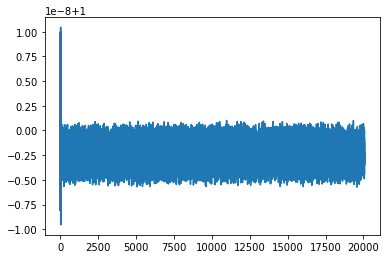

In [14]:
#ensuring normalization
print(np.sum(np.abs(np.square(time_coeffs2)),axis=1))
plt.plot(np.arange(0,time_coeffs2.shape[0]),np.sum(np.abs(np.square(time_coeffs2)),axis=1));

In [15]:
#this is the training data for MMUT ()
rdmMO = np.einsum('ni,nj,ijab->nab',time_coeffs2, np.conjugate(time_coeffs2), tens)

(2.0000000124161446+2.829090043829363e-19j) (1.9999999564319597+9.24959978401696e-19j)


C:\Users\Hardeep\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


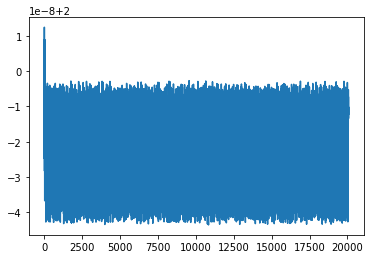

In [16]:
traces = np.einsum('ijj ->i',rdmMO)
print(np.max(traces),np.min(traces))
plt.plot(np.arange(0,time_coeffs2.shape[0]),traces);